In [ ]:
import numpy as np
import pandas as pd
import random
import source.UtilsDataFrame as utilDf
from coreforecast.scalers import boxcox, inv_boxcox, boxcox_lambda
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = np.random.lognormal(mean=0,sigma=0.4,size=100)

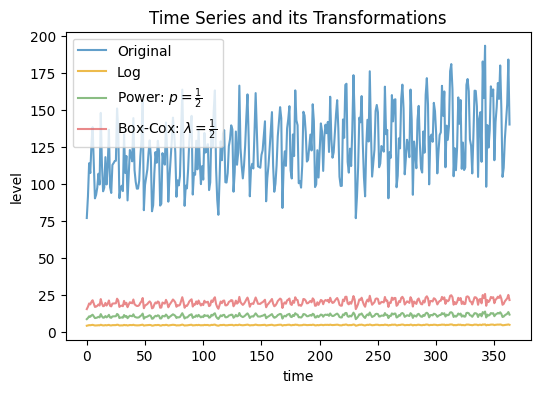

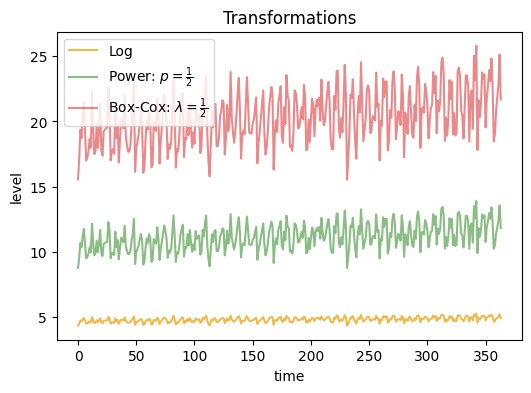

In [2]:
data_df = pd.read_csv("./testData/data-weekly-perYear.csv")
data_df["log"] = np.log(data_df["y"])
data_df["pTransform"] = np.power(data_df["y"], 1/2)
data_df["boxCox"] = boxcox(data_df["y"], 1/2)

plt.figure(figsize=(6,4))
plt.plot(data_df["y"], label="Original", alpha=0.7)
plt.plot(data_df["log"], label="Log", alpha=0.7, color="#E69F00")
plt.plot(data_df["pTransform"], label=r"Power: $p = \frac{1}{2}$", alpha=0.7, color="#59A14F")
plt.plot(data_df["boxCox"], label=r"Box-Cox: $\lambda =  \frac{1}{2}$", alpha=0.7, color="#E15759")
plt.title("Time Series and its Transformations")
plt.xlabel("time")
plt.ylabel("level")
plt.legend()
plt.savefig("./pictures/TimeSeriesTransformations.pdf", bbox_inches="tight")
plt.show()


plt.figure(figsize=(6,4))
plt.plot(data_df["log"], label="Log", alpha=0.7, color="#E69F00")
plt.plot(data_df["pTransform"], label=r"Power: $p = \frac{1}{2}$", alpha=0.7, color="#59A14F")
plt.plot(data_df["boxCox"], label=r"Box-Cox: $\lambda =  \frac{1}{2}$", alpha=0.7, color="#E15759")
plt.title("Transformations")
plt.xlabel("time")
plt.ylabel("level")
plt.legend(loc="upper left")
plt.savefig("./pictures/TransformationsZoomed.pdf", bbox_inches="tight")
plt.show()

-0.8884475827217102


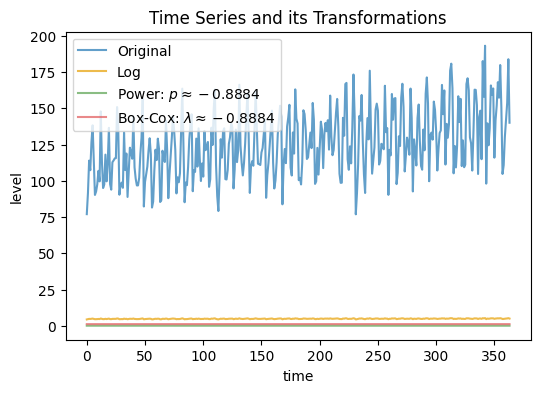

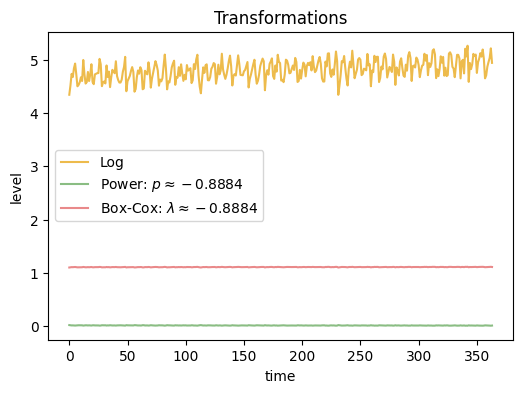

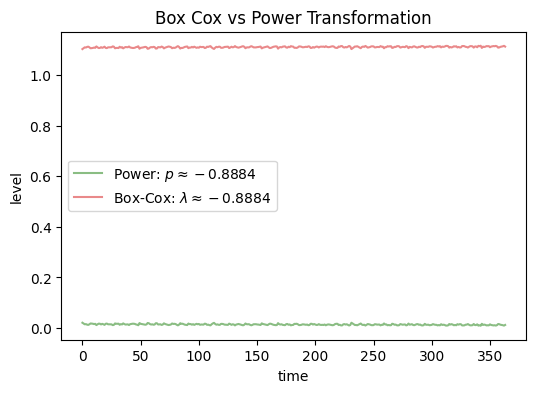

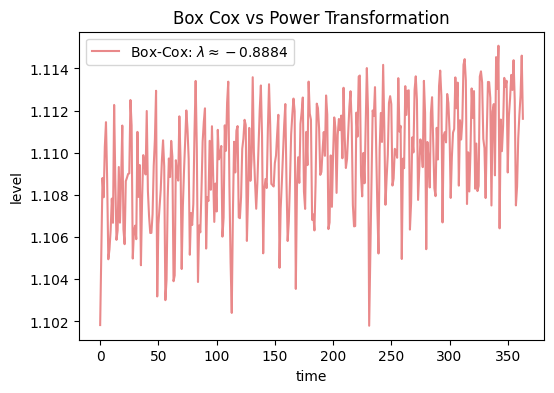

In [3]:
# example for a random lambda and optimal lambda
opt_lambda = boxcox_lambda(data_df["y"], method="guerrero", season_length=7)
data_df["optimizedLambda"] = boxcox(data_df["y"], opt_lambda)
data_df["optimizedPower"] = np.power(data_df["y"], opt_lambda)
print(opt_lambda)

plt.figure(figsize=(6,4))
plt.plot(data_df["y"], label="Original", alpha=0.7)
plt.plot(data_df["log"], label="Log", alpha=0.7, color="#E69F00")
plt.plot(data_df["optimizedPower"], label=fr"Power: $p \approx -0.8884$", alpha=0.7, color="#59A14F")
plt.plot(data_df["optimizedLambda"], label=fr"Box-Cox: $\lambda \approx -0.8884$", alpha=0.7, color="#E15759")
plt.title("Time Series and its Transformations")
plt.xlabel("time")
plt.ylabel("level")
plt.legend()
plt.savefig("./pictures/TSATransformOptimized.pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(data_df["log"], label="Log", alpha=0.7, color="#E69F00")
plt.plot(data_df["optimizedPower"], label=fr"Power: $p \approx -0.8884$", alpha=0.7, color="#59A14F")
plt.plot(data_df["optimizedLambda"], label=fr"Box-Cox: $\lambda \approx -0.8884$", alpha=0.7, color="#E15759")
plt.title("Transformations")
plt.xlabel("time")
plt.ylabel("level")
plt.legend(loc="center left")
plt.savefig("./pictures/TransformOptimized.pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(data_df["optimizedPower"], label=fr"Power: $p \approx -0.8884$", alpha=0.7, color="#59A14F")
plt.plot(data_df["optimizedLambda"], label=fr"Box-Cox: $\lambda \approx -0.8884$", alpha=0.7, color="#E15759")
plt.title("Box Cox vs Power Transformation")
plt.xlabel("time")
plt.ylabel("level")
plt.legend(loc="center left")
plt.savefig("./pictures/BoxCoxVsPowerOptimized.pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(data_df["optimizedLambda"], label=fr"Box-Cox: $\lambda \approx -0.8884$", alpha=0.7, color="#E15759")
plt.title("Box Cox vs Power Transformation")
plt.xlabel("time")
plt.ylabel("level")
plt.legend()
plt.show()

           y
t           
0   1.182395
1   1.165762
2   1.294250
3   1.462698
4   1.395620
..       ...
95  1.623099
96  0.916632
97  3.021518
98  1.125647
99  1.160631

[100 rows x 1 columns]


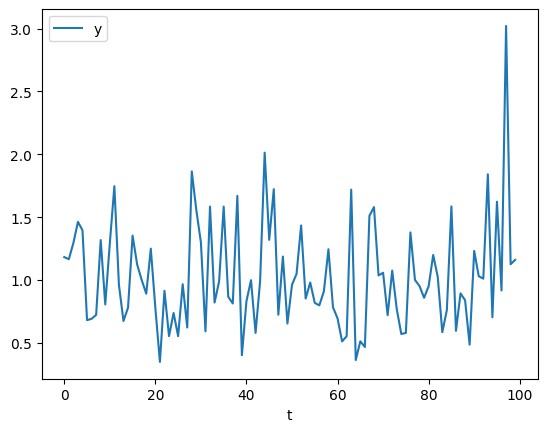

In [4]:
# Simple example for a time series
data_df = pd.DataFrame({"y":data})
data_df.index.name = "t"
print(data_df)
data_df.plot()
plt.show()
# plot_acf(three_year_array_df, lags=24)
# plt.show()

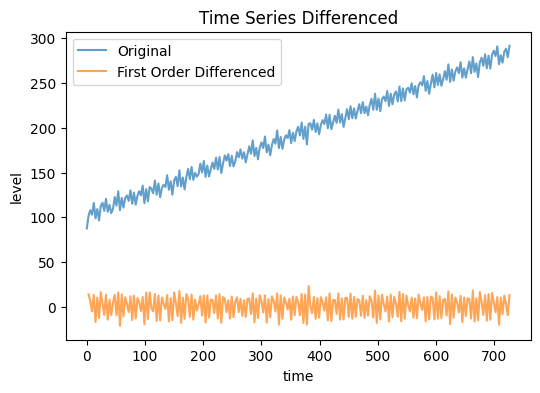

In [5]:
# differencing graphical comparison

trending_df = pd.read_csv("./testData/trending_seasonal_series.csv")[::3]
trending_df["differenced"] = trending_df["y"].diff()

plt.figure(figsize=(6,4))
plt.title("Time Series Differenced")
plt.plot(trending_df["y"], label="Original" , alpha=0.7)
plt.plot(trending_df["differenced"], label="First Order Differenced" , alpha=0.7)
plt.legend()
plt.xlabel("time")
plt.ylabel("level")
plt.savefig("./pictures/TSADifferenced.pdf", bbox_inches="tight")

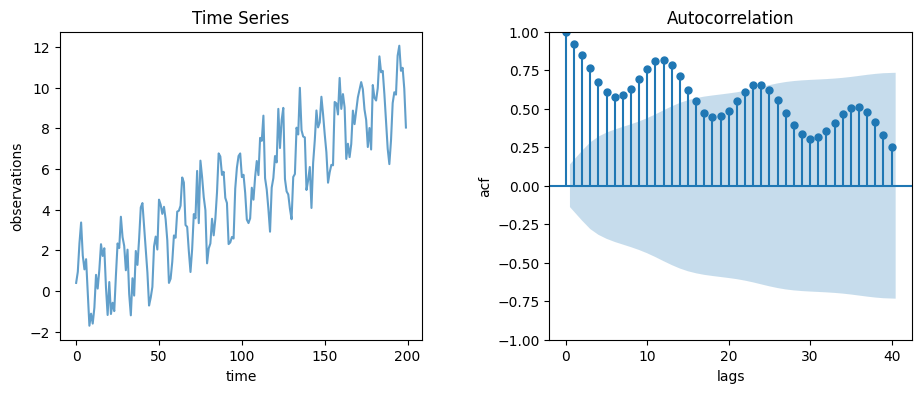

In [6]:
acf_seasonal_df = pd.read_csv("./testData/trend_seasonal_series_ACF_PACF.csv")

fig, axes = plt.subplots(1 , 2, figsize=(11,4))
axes[0].plot(acf_seasonal_df["y"], label="Original", alpha=0.7)
axes[0].set_title("Time Series")
axes[0].set_xlabel("time")
axes[0].set_ylabel("observations")

plot_acf(acf_seasonal_df["y"], lags = 40, ax=axes[1])
# plt.savefig("./pictures/ACF_trend_seasonal_example.pdf", bbox_inches="tight")
axes[1].set_title("Autocorrelation")
axes[1].set_xlabel("lags")
axes[1].set_ylabel("acf")
plt.subplots_adjust(wspace=0.35) 
plt.savefig("./pictures/ACF_trend_seasonal_example.pdf", bbox_inches="tight")
plt.show()

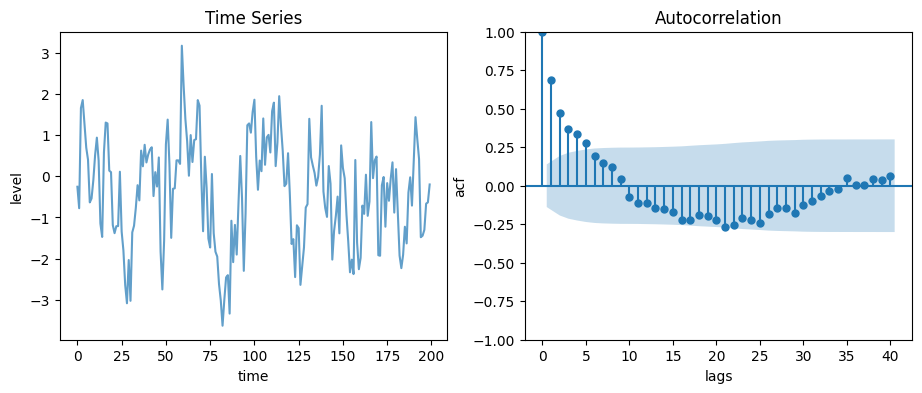

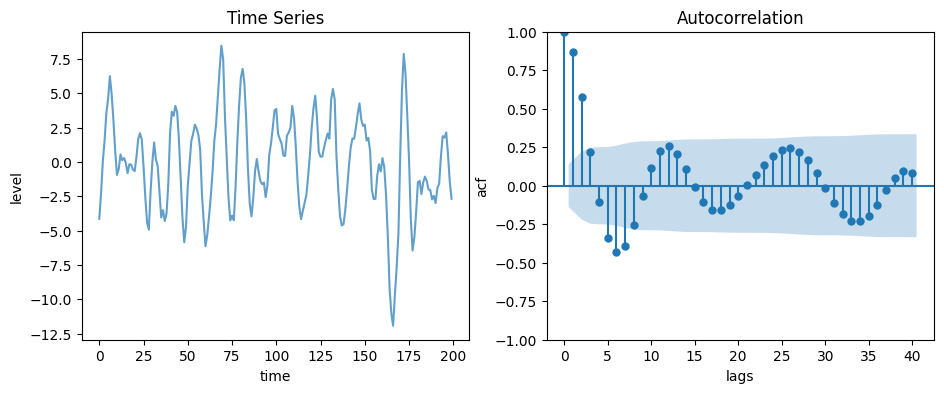

In [7]:
# examples for ACF plots showing sinsoidal and exponential decay
acf_exponential = pd.read_csv("./testData/ar1_exponential_200.csv")
acf_sinsoidal = pd.read_csv("./testData/ar2_damped_sinusoid_200.csv")


# plot exponential
fig, axes = plt.subplots(1, 2, figsize=(11,4))

axes[0].plot(acf_exponential["y"], label="Original", alpha=0.7)
axes[0].set_title("Time Series")
axes[0].set_xlabel("time")
axes[0].set_ylabel("level")

plot_acf(acf_exponential["y"], lags="40" ,ax=axes[1])
axes[1].set_title("Autocorrelation")
axes[1].set_xlabel("lags")
axes[1].set_ylabel("acf")
plt.savefig("./pictures/ACF_exponential_decay.pdf", bbox_inches="tight")
# plot sinusoidal
fig, axes = plt.subplots(1, 2, figsize=(11,4))

axes[0].plot(acf_sinsoidal["y"], label="Original", alpha=0.7)
axes[0].set_title("Time Series")
axes[0].set_xlabel("time")
axes[0].set_ylabel("level")

plot_acf(acf_sinsoidal["y"], lags="40" ,ax=axes[1])
axes[1].set_title("Autocorrelation")
axes[1].set_xlabel("lags")
axes[1].set_ylabel("acf")
plt.savefig("./pictures/ACF_sinusoidal_decay.pdf", bbox_inches="tight")

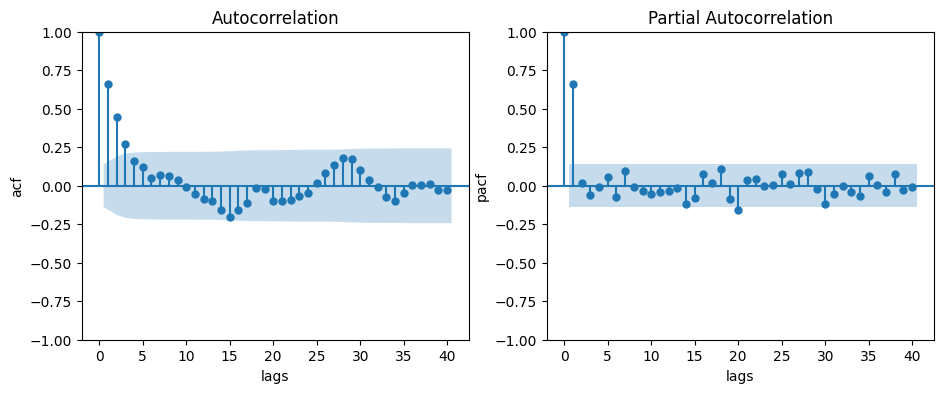

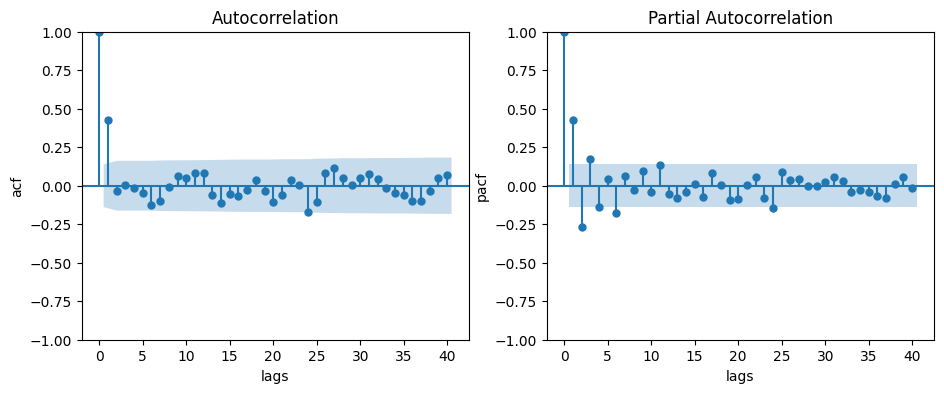

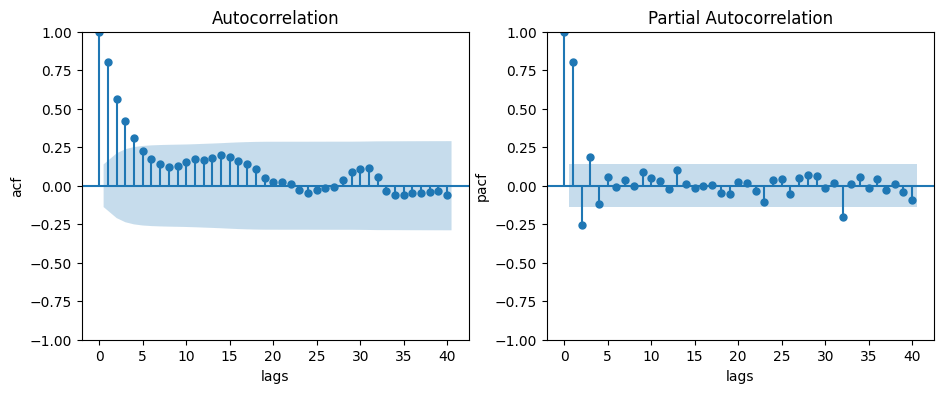

In [8]:
# examples for p,q selection for ARMA/ARIMA models

arma_df = pd.read_csv("./testData/TS_datasets_AR_MA_ARMA_N200.csv")

# AR (1)

# plt.figure(figsize=(10,6))
# plt.plot(arma_df["AR1"], label="Original", alpha=0.7)
# plt.title("Time Series")
# plt.xlabel("time")
# plt.ylabel("level")
# plt.savefig("./pictures/ARMA_AR(1)_example.pdf", bbox_inches="tight")

fig,axes = plt.subplots(1,2, figsize=(11,4))
plot_acf(arma_df["AR1"], lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation")
axes[0].set_xlabel("lags")
axes[0].set_ylabel("acf")

plot_pacf(arma_df["AR1"], lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation")
axes[1].set_xlabel("lags")
axes[1].set_ylabel("pacf")
plt.savefig("./pictures/ARMA_AR(1)_ACF_PACF_example.pdf", bbox_inches="tight")

# MA(1)
fig,axes = plt.subplots(1,2, figsize=(11,4))

plot_acf(arma_df["MA1"], lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation")
axes[0].set_xlabel("lags")
axes[0].set_ylabel("acf")

plot_pacf(arma_df["MA1"], lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation")
axes[1].set_xlabel("lags")
axes[1].set_ylabel("pacf")
plt.savefig("./pictures/ARMA_MA(1)_ACF_PACF_example.pdf", bbox_inches="tight")

# ARMA(1,1)
fig,axes = plt.subplots(1,2, figsize=(11,4))

plot_acf(arma_df["ARMA11"], lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation")
axes[0].set_xlabel("lags")
axes[0].set_ylabel("acf")

plot_pacf(arma_df["ARMA11"], lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation")
axes[1].set_xlabel("lags")
axes[1].set_ylabel("pacf")
plt.savefig("./pictures/ARMA_ARMA(1_1)_ACF_PACF_example.pdf", bbox_inches="tight")


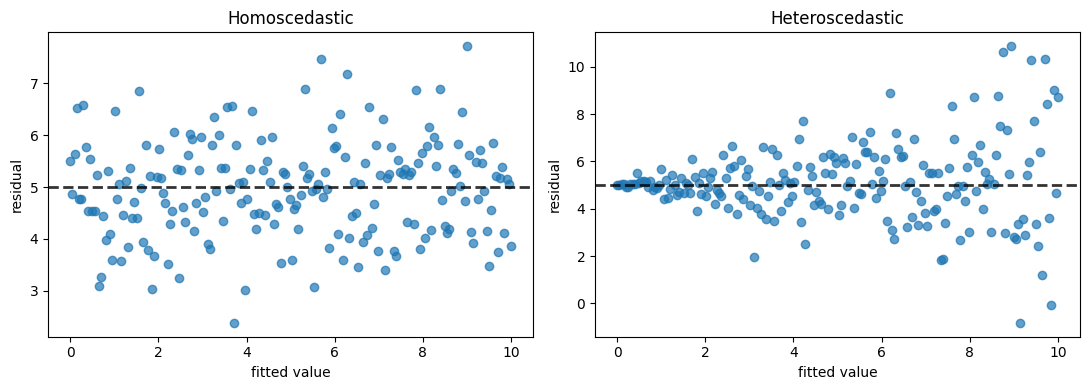

In [20]:
# example plot for homo and heteroscedasticity

df_homo_hetero = pd.read_csv("./testData/hetero_vs_homo.csv")

fig, axes = plt.subplots(1, 2, figsize=(11,4))
axes[0].scatter(df_homo_hetero["x"],df_homo_hetero["y_homo"], alpha=0.7)
axes[0].axhline(df_homo_hetero["x"].mean(), color = "black", linestyle="--", linewidth=2, alpha=0.8)
axes[0].set_title("Homoscedastic")
axes[0].set_xlabel("fitted value")
axes[0].set_ylabel("residual")

axes[1].scatter(df_homo_hetero["x"],df_homo_hetero["y_hetero"], alpha=0.7)
axes[1].axhline(df_homo_hetero["x"].mean(), color = "black", linestyle="--", linewidth=2, alpha=0.8)
axes[1].set_title("Heteroscedastic")
axes[1].set_xlabel("fitted value")
axes[1].set_ylabel("residual")

plt.savefig("./pictures/hetero_vs_homo.pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()
